In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head(5)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [8]:
# handling number columns
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='number', ylabel='count'>

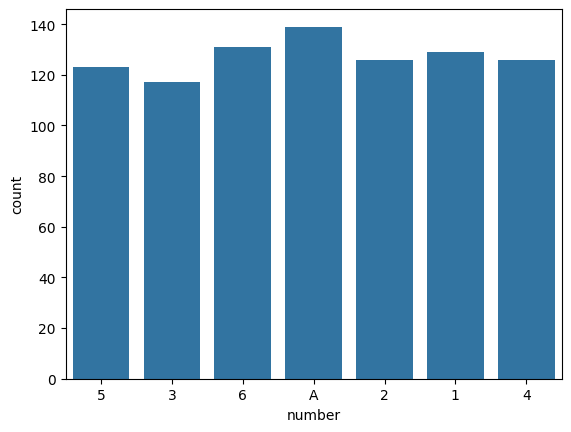

In [10]:
sns.countplot(x='number',data=df)

In [11]:
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [13]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN
5,NaN,330877,2,0,2.0
6,E46,17463,2,0,2.0
7,NaN,349909,5,0,5.0
8,NaN,347742,1,1,1.0
9,NaN,237736,A,1,NaN


In [14]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)


In [16]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
5,NaN,330877,2,0,2.0,NaN
6,E46,17463,2,0,2.0,NaN
7,NaN,349909,5,0,5.0,NaN
8,NaN,347742,1,1,1.0,NaN
9,NaN,237736,A,1,NaN,A


In [18]:
# now cabin column
df['cabin_num']=df['Cabin'].str.extract('(\d+)')

In [19]:
df['cabin_cat']=df['Cabin'].str[0]

In [20]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN
6,E46,17463,2,0,2.0,NaN,46,E
7,NaN,349909,5,0,5.0,NaN,NaN,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN


In [21]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [22]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN
